# Readme embedding evaluation (100 repostitories / validation set)

## 1. Loading repository information

In [ ]:
!pip install gdown
!gdown 12njH7JojRSgK6yzfHmhdZSrnfVN9x9NQ

Downloading...
From: https://drive.google.com/uc?id=12njH7JojRSgK6yzfHmhdZSrnfVN9x9NQ
To: /content/repo_info_validation.pkl
100% 51.4M/51.4M [00:00<00:00, 239MB/s]


In [ ]:
import pickle

with open("repo_info_validation.pkl", "rb") as f:
    repo_info = pickle.load(f)
    f.close()

## 2. Download pre-trained model

In [ ]:
!pip3 install torch
!pip3 install transformers
!wget https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
# !curl -O https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.5 MB/s eta 0:00:00
--2023-07-09 18:25:31--  https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10352 (10K) [text/plain]
Saving to: ‘unixcoder.py’

unixcoder.py        100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-07-09 18:25:31 (111 MB/s) - ‘unixcoder.py’ saved [10352/10352]



In [ ]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [ ]:
unixcoder_model_names = [
    "Lazyhope/unixcoder-nine-advtest",
]

In [ ]:
from unixcoder import UniXcoder

unixcoder_models = {}

# Initialise unixcoder model
for u_name in unixcoder_model_names:
    unixcoder_models[u_name] = UniXcoder(u_name)
    unixcoder_models[u_name].to(device)

## 3. Generating readme embeddings

In [ ]:
# Getting readme embeddings
def get_unixcoder_embeddings(data, model):
    tokens_ids = model.tokenize([data], max_length=512, mode="<encoder-only>")
    source_ids = torch.tensor(tokens_ids).to(device)
    _, embeddings = model(source_ids)
    return embeddings

# Getting other embbeddings
def get_other_embeddings(data_list):
    embeddings = {}

    # Unixcoder model
    for u_name, u_model in tqdm(unixcoder_models.items()):
        print(f" - Using {u_name} model - ")
        embeddings_list = torch.concat([get_unixcoder_embeddings(data, u_model) for data in data_list])
        embeddings[u_name] = embeddings_list

    return embeddings


# Getting embeddings
def get_embeddings(input_data=None, input_mode=None):
    if input_data is None or not input_data:
        return torch.zeros((768,), device=device)

    with torch.no_grad():
        if input_mode == "readme":
            return get_other_embeddings(input_data)


In [ ]:
from tqdm import tqdm

for repo_name, repo_dict in tqdm(repo_info.items()):
    print(f" - Generating readme embeddings for {repo_name} - ")
    repo_dict["readme_embeddings"] = get_embeddings(input_data=repo_dict["readme"], input_mode="readme")

  0%|          | 0/100 [00:00<?, ?it/s]

 - Generating readme embeddings for pyparsing/pyparsing - 



100%|██████████| 1/1 [00:00<00:00, 33.40it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for JohnLangford/vowpal_wabbit - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  2%|▏         | 2/100 [00:00<00:19,  4.92it/s]

 - Generating readme embeddings for django/channels - 



100%|██████████| 1/1 [00:00<00:00, 19.92it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for gak/pycallgraph - 



  4%|▍         | 4/100 [00:00<00:10,  8.82it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for Microsoft/PTVS - 



100%|██████████| 1/1 [00:00<00:00, 17.68it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for fabtools/fabtools - 



100%|██████████| 1/1 [00:00<00:00, 55.64it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for indico/indico - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


  7%|▋         | 7/100 [00:00<00:06, 13.73it/s]

 - Generating readme embeddings for ray-project/ray - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


 - Generating readme embeddings for PyMySQL/PyMySQL - 



  9%|▉         | 9/100 [00:01<00:19,  4.58it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for fxsjy/jieba - 



100%|██████████| 1/1 [00:00<00:00,  8.89it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for tartiflette/tartiflette-asgi - 



 11%|█         | 11/100 [00:01<00:15,  5.88it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for nose-devs/nose2 - 



100%|██████████| 1/1 [00:00<00:00, 41.88it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 - Generating readme embeddings for lepture/mistune - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 20.23it/s]


 - Generating readme embeddings for worldveil/dejavu - 



 14%|█▍        | 14/100 [00:01<00:10,  8.50it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for willmcgugan/rich - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


 - Generating readme embeddings for PetrochukM/PyTorch-NLP - 



 16%|█▌        | 16/100 [00:02<00:19,  4.40it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for ionelmc/python-hunter - 



100%|██████████| 1/1 [00:00<00:00, 26.96it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for WhyNotHugo/python-barcode - 



100%|██████████| 1/1 [00:00<00:00, 61.26it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for davedoesdev/python-jwt - 



100%|██████████| 1/1 [00:00<00:00, 46.77it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for chriskiehl/Gooey - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 20%|██        | 20/100 [00:03<00:11,  6.85it/s]

 - Generating readme embeddings for jpadilla/pyjwt - 



100%|██████████| 1/1 [00:00<00:00, 54.94it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for mindsdb/mindsdb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 22%|██▏       | 22/100 [00:04<00:25,  3.06it/s]

 - Generating readme embeddings for facebookresearch/hydra - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


 - Generating readme embeddings for Instagram/MonkeyType - 



 24%|██▍       | 24/100 [00:05<00:22,  3.44it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for frewsxcv/python-geojson - 



100%|██████████| 1/1 [00:00<00:00, 29.83it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for zostera/django-bootstrap4 - 



100%|██████████| 1/1 [00:00<00:00, 33.11it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for google/pytype - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 27%|██▋       | 27/100 [00:05<00:15,  4.58it/s]

 - Generating readme embeddings for pricingassistant/mrq - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 13.76it/s]


 - Generating readme embeddings for tylerlaberge/PyPattyrn - 



 29%|██▉       | 29/100 [00:05<00:12,  5.52it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for mkdocs/mkdocs - 



100%|██████████| 1/1 [00:00<00:00, 22.50it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for ionelmc/python-manhole - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 30.74it/s]


 - Generating readme embeddings for encode/uvicorn - 



 32%|███▏      | 32/100 [00:05<00:08,  7.61it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for davidhalter/jedi - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 19.45it/s]


 - Generating readme embeddings for tomerfiliba/rpyc - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 34%|███▍      | 34/100 [00:05<00:07,  8.96it/s]

 - Generating readme embeddings for python-greenlet/greenlet - 



100%|██████████| 1/1 [00:00<00:00, 58.38it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for scottrogowski/code2flow - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 19.51it/s]


 - Generating readme embeddings for jiaaro/pydub - 
 - Generating readme embeddings for python-rope/rope - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 38%|███▊      | 38/100 [00:05<00:04, 12.84it/s]

 - Generating readme embeddings for scanny/python-pptx - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 35.76it/s]


 - Generating readme embeddings for sshwsfc/xadmin - 



100%|██████████| 1/1 [00:00<00:00, 54.08it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for klen/pylama - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 41%|████      | 41/100 [00:06<00:03, 15.53it/s]

 - Generating readme embeddings for django-compressor/django-compressor - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 49.57it/s]


 - Generating readme embeddings for ahupp/python-magic - 



100%|██████████| 1/1 [00:00<00:00, 44.49it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for ovalhub/pyicu - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 30.48it/s]


 - Generating readme embeddings for lancopku/pkuseg-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 45%|████▌     | 45/100 [00:06<00:03, 17.58it/s]

 - Generating readme embeddings for chardet/chardet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 23.46it/s]


 - Generating readme embeddings for tqdm/tqdm - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


 - Generating readme embeddings for peterbrittain/asciimatics - 



 48%|████▊     | 48/100 [00:06<00:03, 17.28it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for rsalmei/alive-progress - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 10.52it/s]


 - Generating readme embeddings for lxneng/alipay - 



100%|██████████| 1/1 [00:00<00:00, 33.47it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for beetbox/audioread - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 51%|█████     | 51/100 [00:06<00:02, 17.20it/s]

 - Generating readme embeddings for mitsuhiko/pluginbase - 



100%|██████████| 1/1 [00:00<00:00, 68.19it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for coala/coala - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 47.37it/s]


 - Generating readme embeddings for aaugustin/websockets - 



100%|██████████| 1/1 [00:00<00:00, 26.88it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for ryanmcgrath/twython - 



 55%|█████▌    | 55/100 [00:06<00:02, 20.44it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for JaidedAI/EasyOCR - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 1/1 [00:00<00:00,  9.64it/s]


 - Generating readme embeddings for python-pillow/Pillow - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


 - Generating readme embeddings for facebook/PathPicker - 



 58%|█████▊    | 58/100 [00:06<00:02, 17.45it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for NicolasHug/Surprise - 



100%|██████████| 1/1 [00:00<00:00, 31.58it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for daboth/pagan - 



100%|██████████| 1/1 [00:00<00:00, 49.68it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for gaojiuli/toapi - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 49.08it/s]


 - Generating readme embeddings for flask-restful/flask-restful - 



 62%|██████▏   | 62/100 [00:07<00:01, 20.43it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for dabeaz/ply - 



100%|██████████| 1/1 [00:00<00:00, 42.06it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for lorien/grab - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 45.67it/s]


 - Generating readme embeddings for dbcli/litecli - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 50.56it/s]


 - Generating readme embeddings for lemire/simdjson - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 66%|██████▌   | 66/100 [00:07<00:01, 21.00it/s]

 - Generating readme embeddings for secdev/scapy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 17.94it/s]


 - Generating readme embeddings for jindaxiang/akshare - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 18.06it/s]


 - Generating readme embeddings for myusuf3/delorean - 



 69%|██████▉   | 69/100 [00:07<00:01, 20.48it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for facebookresearch/pytext - 



100%|██████████| 1/1 [00:00<00:00, 51.73it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for psf/requests-html - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 25.01it/s]


 - Generating readme embeddings for vispy/vispy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 72%|███████▏  | 72/100 [00:07<00:01, 18.58it/s]

 - Generating readme embeddings for joke2k/faker - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 27.01it/s]


 - Generating readme embeddings for Manisso/fsociety - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 41.64it/s]


 - Generating readme embeddings for crossbario/autobahn-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 75%|███████▌  | 75/100 [00:08<00:02,  8.79it/s]

 - Generating readme embeddings for encode/orm - 



100%|██████████| 1/1 [00:00<00:00, 34.34it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for grantjenks/python-sortedcontainers - 



100%|██████████| 1/1 [00:00<00:00, 37.13it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for Delgan/loguru - 



 78%|███████▊  | 78/100 [00:08<00:02, 10.89it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for ajenti/ajenti - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


 - Generating readme embeddings for mining/mining - 



 80%|████████  | 80/100 [00:08<00:02,  8.85it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for fogleman/Quads - 



100%|██████████| 1/1 [00:00<00:00, 66.79it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for andialbrecht/sqlparse - 



100%|██████████| 1/1 [00:00<00:00, 55.53it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for spyder-ide/spyder - 



 83%|████████▎ | 83/100 [00:09<00:01, 10.57it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for timofurrer/try - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 44.77it/s]


 - Generating readme embeddings for tyiannak/pyAudioAnalysis - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 23.23it/s]


 - Generating readme embeddings for python/black - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 86%|████████▌ | 86/100 [00:09<00:01, 12.69it/s]

 - Generating readme embeddings for bloomberg/bqplot - 



100%|██████████| 1/1 [00:00<00:00, 20.98it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for httplib2/httplib2 - 



100%|██████████| 1/1 [00:00<00:00, 50.91it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for pypa/virtualenv - 



100%|██████████| 1/1 [00:00<00:00, 51.91it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 89%|████████▉ | 89/100 [00:09<00:00, 15.36it/s]

 - Generating readme embeddings for scrapinghub/portia - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 19.82it/s]


 - Generating readme embeddings for metawilm/cl-python - 



100%|██████████| 1/1 [00:00<00:00, 49.05it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for shazow/urllib3 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 92%|█████████▏| 92/100 [00:09<00:00, 16.84it/s]

 - Generating readme embeddings for ponyorm/pony - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 49.88it/s]


 - Generating readme embeddings for antocuni/pdb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 28.95it/s]


 - Generating readme embeddings for elastic/elasticsearch-dsl-py - 



 95%|█████████▌| 95/100 [00:09<00:00, 19.06it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for mstamy2/PyPDF2 - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 46.04it/s]


 - Generating readme embeddings for pytoolz/cytoolz - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 49.31it/s]


 - Generating readme embeddings for tartiflette/tartiflette-aiohttp - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 98%|█████████▊| 98/100 [00:09<00:00, 20.46it/s]

 - Generating readme embeddings for asweigart/pyautogui - 



100%|██████████| 1/1 [00:00<00:00, 44.98it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for pyeve/eve - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 100/100 [00:09<00:00, 10.22it/s]


## 4. Saving readme embeddings

In [ ]:
save_device = "cpu"
# Change the tensor format to CPU
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["readme_embeddings"]) is torch.Tensor:
        repo_info[repo_name]["readme_embeddings"] = repo_info[repo_name]["readme_embeddings"].to(save_device)
    else:
        for model_name, model_tensor in repo_dict["readme_embeddings"].items():
            repo_info[repo_name]["readme_embeddings"][model_name] = model_tensor.to(save_device)

In [ ]:
# Check the tensor format
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["readme_embeddings"]) is torch.Tensor:
        print(repo_dict["readme_embeddings"].get_device())
    else:
        for model_name, model_tensor in repo_dict["readme_embeddings"].items():
             print(repo_info[repo_name]["readme_embeddings"][model_name].get_device())

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [ ]:
with open("repo_info_validation_readme_embeddings.pkl", "wb") as f:
    pickle.dump(repo_info, f)
    f.close()

## 5. Calculating similarity

In [ ]:
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

models = unixcoder_model_names

for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]
    for model_name in models:

        if type(repo_info[repo1]["readme_embeddings"]) is torch.Tensor:
            embedding1 = repo_info[repo1]["readme_embeddings"]
        else:
            embedding1 = torch.mean(repo_info[repo1]["readme_embeddings"][model_name], dim=0)

        if type(repo_info[repo2]["readme_embeddings"]) is torch.Tensor:
            embedding2 = repo_info[repo2]["readme_embeddings"]
        else:
            embedding2 = torch.mean(repo_info[repo2]["readme_embeddings"][model_name], dim=0)

        similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
        row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + models)
df

100%|██████████| 4950/4950 [00:00<00:00, 12977.60it/s]


,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,pyparsing/pyparsing,JohnLangford/vowpal_wabbit,Parser,Machine Learning,0.499978
1,pyparsing/pyparsing,django/channels,Parser,WebSocket,0.295796
2,pyparsing/pyparsing,gak/pycallgraph,Parser,Code Analysis,0.473191
3,pyparsing/pyparsing,Microsoft/PTVS,Parser,Visual Studio,0.481464
4,pyparsing/pyparsing,fabtools/fabtools,Parser,SSH-style Deployment,0.455127
...,...,...,...,...,...
4945,pytoolz/cytoolz,asweigart/pyautogui,Functional Programming,GUI / Web Testing,0.360821
4946,pytoolz/cytoolz,pyeve/eve,Functional Programming,Flask,0.134485
4947,tartiflette/tartiflette-aiohttp,asweigart/pyautogui,GraphQL,GUI / Web Testing,0.197305
4948,tartiflette/tartiflette-aiohttp,pyeve/eve,GraphQL,Flask,0.469383


In [ ]:
df.dropna(inplace=True, subset=models)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,pyparsing/pyparsing,JohnLangford/vowpal_wabbit,Parser,Machine Learning,0.499978
1,pyparsing/pyparsing,django/channels,Parser,WebSocket,0.295796
2,pyparsing/pyparsing,gak/pycallgraph,Parser,Code Analysis,0.473191
3,pyparsing/pyparsing,Microsoft/PTVS,Parser,Visual Studio,0.481464
4,pyparsing/pyparsing,fabtools/fabtools,Parser,SSH-style Deployment,0.455127
...,...,...,...,...,...
4945,pytoolz/cytoolz,asweigart/pyautogui,Functional Programming,GUI / Web Testing,0.360821
4946,pytoolz/cytoolz,pyeve/eve,Functional Programming,Flask,0.134485
4947,tartiflette/tartiflette-aiohttp,asweigart/pyautogui,GraphQL,GUI / Web Testing,0.197305
4948,tartiflette/tartiflette-aiohttp,pyeve/eve,GraphQL,Flask,0.469383


In [ ]:
df.to_csv("readme_embedding_evaluation_validation_100.csv")

## 6. Evaluating different models

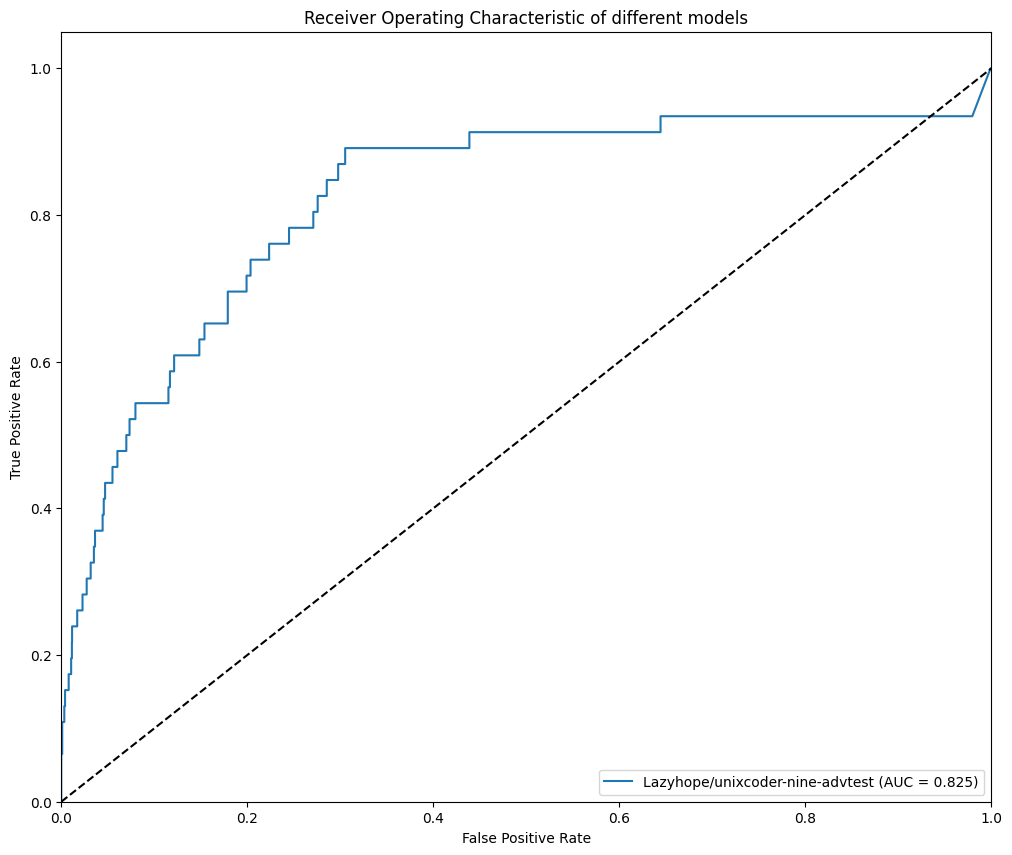

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))


def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)


for model in models:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_readme_evaluation_validation_100.png')
plt.show()

In [ ]:
model_auc

{'Lazyhope/unixcoder-nine-advtest': 0.82459748918363}